## Importing required libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Reading the Data Set using Pandas

In [3]:
# columns of dataset
columns = ["height","length","area","eccen","p_black","p_and","mean_tr","blackpix","blackand","wb_trans","class"]

df = pd.read_csv("page-blocks.data" ,sep="\s+" ,names=columns,header=None)

blocks =["text","hz_line","graphic","ver_line","picture"] # Categories of targetted variable

In [4]:
df.shape  # dimension of dataset

(5473, 11)

In [5]:
df.head()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,class
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1


### Creating CSV file of Dataset extracted from '.data' file

In [6]:
df.to_csv('Group_10_data.csv', encoding='utf-8',index=False)

## Data Preprocessing

In [7]:
df.isna().sum() #checking for missing values

height      0
length      0
area        0
eccen       0
p_black     0
p_and       0
mean_tr     0
blackpix    0
blackand    0
wb_trans    0
class       0
dtype: int64

In [71]:
df['class'].value_counts()

1    4913
2     329
5     115
4      88
3      28
Name: class, dtype: int64

### Note:
The data has no missing data

## A statistical view into the Dataset

In [8]:
df.describe().T #statistical analysis

,count,mean,std,min,25%,50%,75%,max
height,5473.0,10.473232,18.960564,1.000,7.000,8.000,10.000,804.0
length,5473.0,89.568244,114.721758,1.000,17.000,41.000,107.000,553.0
area,5473.0,1198.405628,4849.376950,7.000,114.000,322.000,980.000,143993.0
eccen,5473.0,13.753977,30.703737,0.007,2.143,5.167,13.625,537.0
p_black,5473.0,0.368642,0.177757,0.052,0.261,0.337,0.426,1.0
p_and,5473.0,0.785053,0.170661,0.062,0.679,0.803,0.927,1.0
mean_tr,5473.0,6.219278,69.079021,1.000,1.610,2.070,3.000,4955.0
blackpix,5473.0,365.930751,1270.333082,7.000,42.000,108.000,284.000,33017.0
blackand,5473.0,741.108167,1881.504302,7.000,95.000,250.000,718.000,46133.0
wb_trans,5473.0,106.662891,167.308362,1.000,17.000,49.000,126.000,3212.0


## Overview of frequency of Targetted Categories

<AxesSubplot:ylabel='Frequency'>

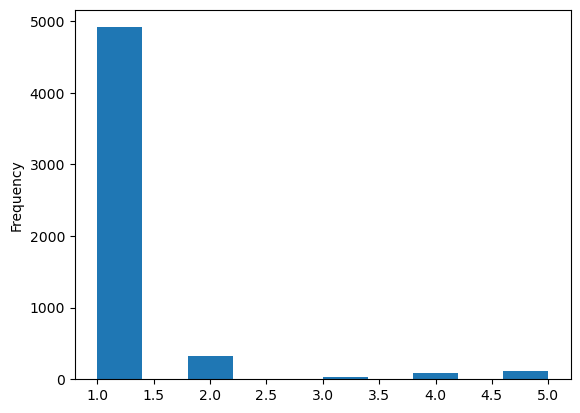

In [9]:
df['class'].plot(kind='hist') # highly imbalanced dataset

## Overview of distribution of each variable 

##### gives the relation of targetted variable with all other variables

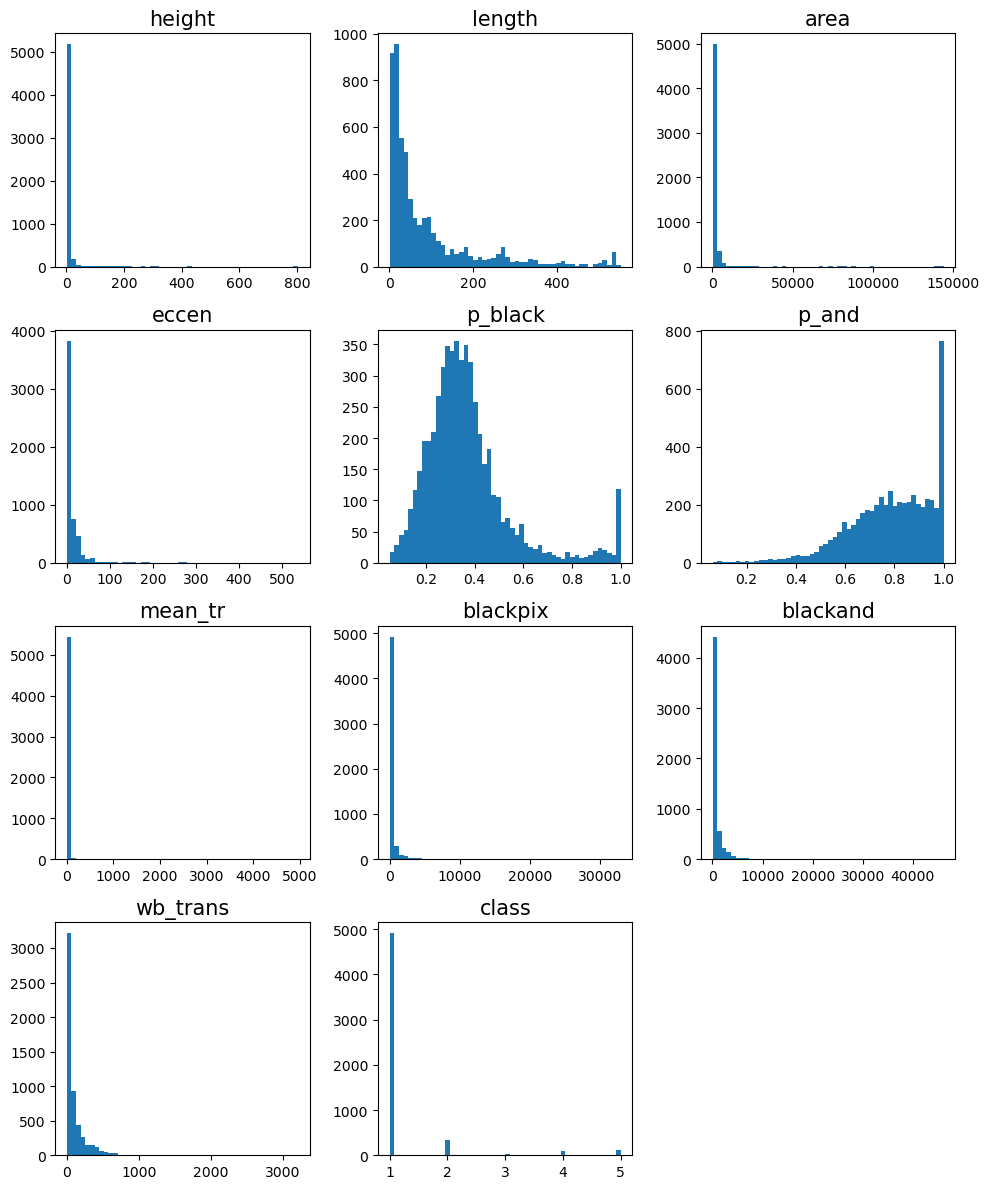

In [10]:
i=1
plt.figure(figsize=(10,12))

for col in df.columns:
    plt.subplot(4,3,i)
    plt.hist(df[col],bins=50)
    plt.tight_layout()
    plt.title(col,fontsize=15)
    i+=1

## Each variable with respect to Targetted Variable
##### looking for possibility of outliers and errors

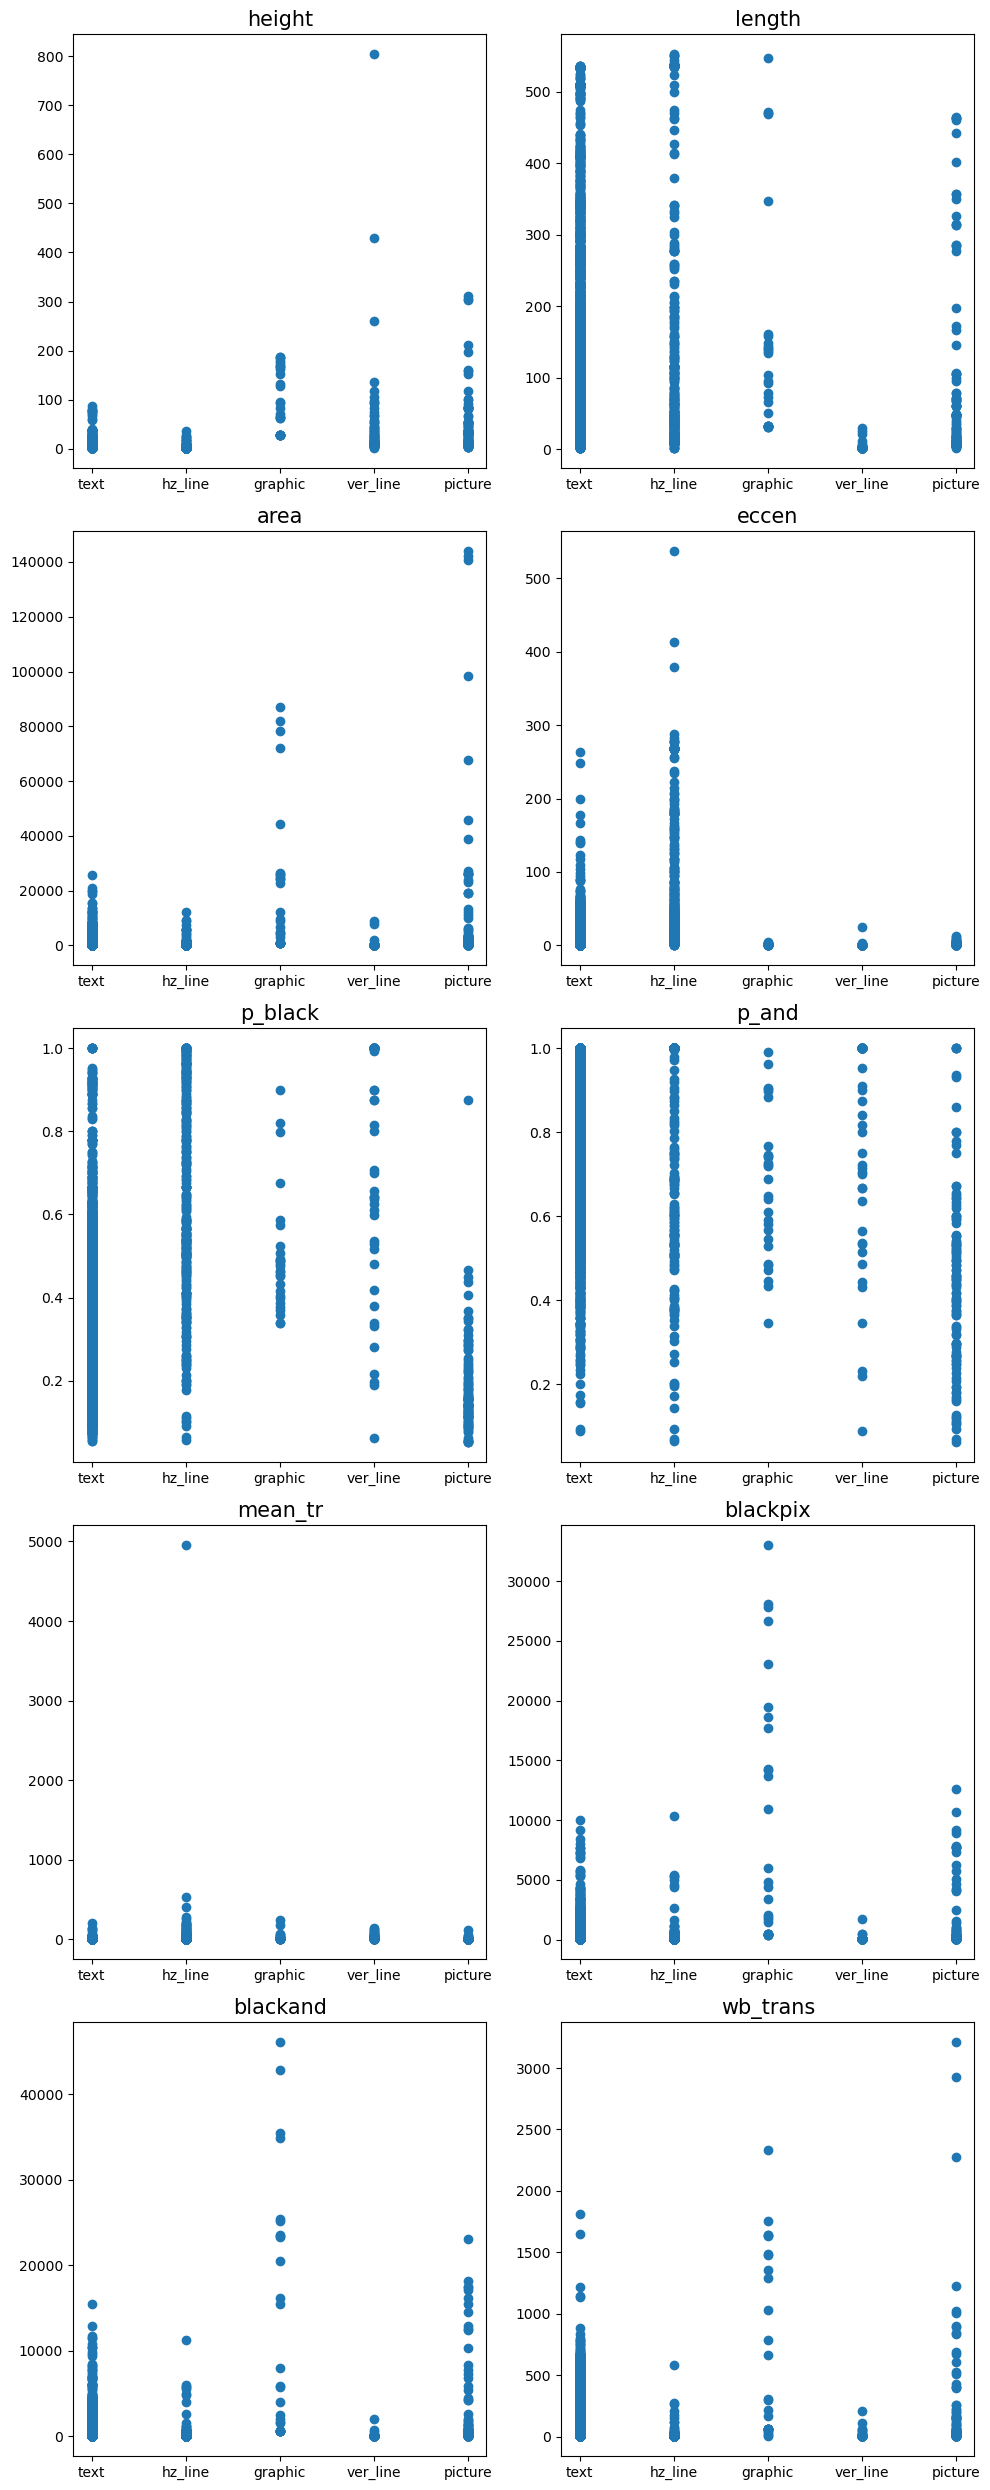

In [11]:
i=1
plt.figure(figsize=(10,25))
for col in df.drop(columns='class').columns:
    plt.subplot(5,2,i)
    plt.scatter(df['class'],df[col])
    plt.tight_layout()
    plt.xticks(range(1,6),blocks)
    plt.title(col,fontsize=15)
    i+=1

## Boxplot analysis to find the admissable range of variables and range of outliers

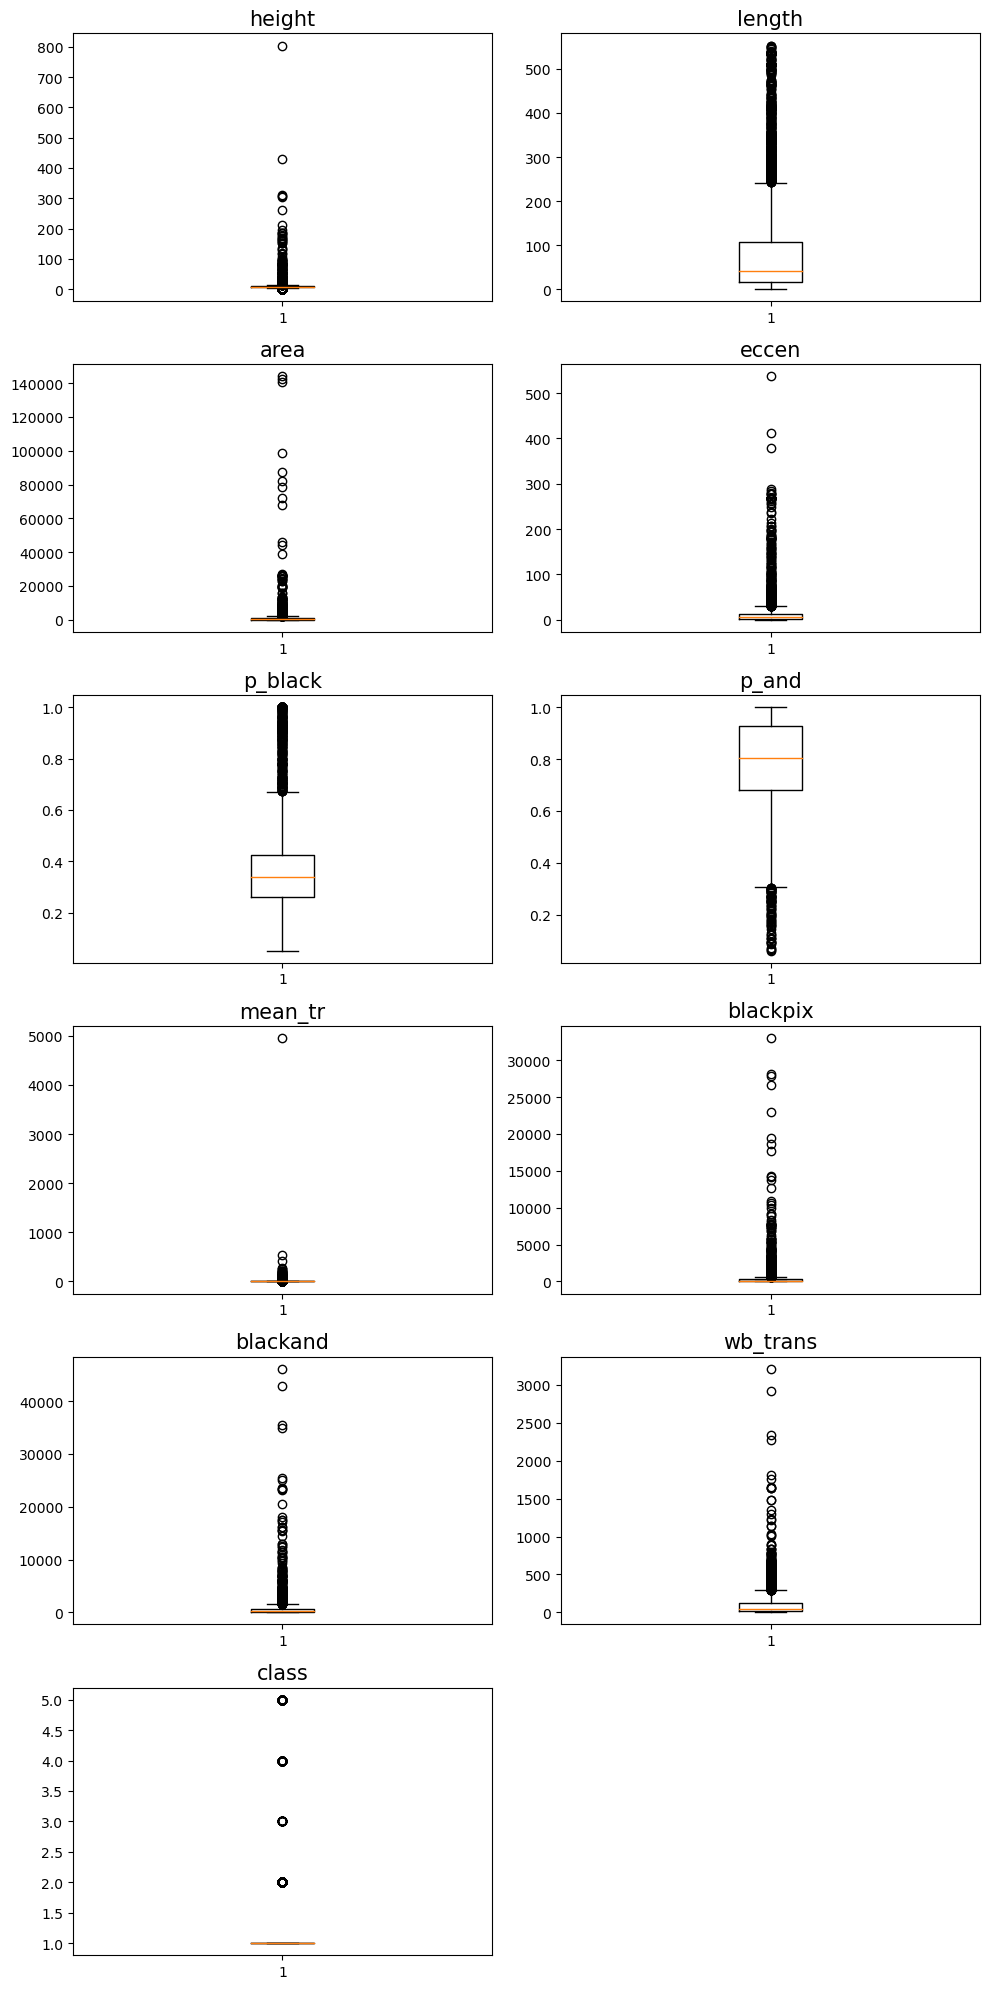

In [12]:
i=1
plt.figure(figsize=(10,20))

for col in df.columns:
    plt.subplot(6,2,i)
    plt.boxplot(df[col])
    plt.tight_layout()
    plt.title(col,fontsize=15)
    i+=1

## Removing outliers on the basis of ranges found from the boxplot analysis

In [59]:
filtered_data = pd.DataFrame()

for col in df.columns:
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    filtered_col = df.loc[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    filtered_data[col] = filtered_col[col]

filtered_data.head()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,class
0,5,7.0,35.0,1.400,0.400,0.657,2.33,14.0,23.0,6.0,1.0
1,6,7.0,42.0,1.167,0.429,0.881,3.60,18.0,37.0,5.0,1.0
2,6,18.0,108.0,3.000,0.287,0.741,4.43,31.0,80.0,7.0,1.0
3,5,7.0,35.0,1.400,0.371,0.743,4.33,13.0,26.0,3.0,1.0
4,6,3.0,18.0,0.500,0.500,0.944,2.25,9.0,17.0,4.0,1.0


In [60]:
filtered_data.isna().sum()

height        0
length      459
area        445
eccen       265
p_black     111
p_and        35
mean_tr     403
blackpix    343
blackand    381
wb_trans    412
class       144
dtype: int64

In [64]:
filtered_data['length'].mean()

53.176539452118945

In [65]:
filtered_data.fillna(filtered_data.mean(), inplace=True)

In [66]:
filtered_data.isna().sum()

height      0
length      0
area        0
eccen       0
p_black     0
p_and       0
mean_tr     0
blackpix    0
blackand    0
wb_trans    0
class       0
dtype: int64

In [67]:
filtered_data['length'].mean()

53.1765394521181

In [68]:
df.shape,filtered_data.shape

((5473, 11), (4730, 11))

In [69]:
print("percentage of outliers:",100*(df.shape[0]-filtered_data.shape[0])/df.shape[0])

percentage of outliers: 13.57573542846702


In [70]:
filtered_data['class'].value_counts()

1.0    4730
Name: class, dtype: int64

as the 13.57% is too high to drop. so it's not a good idea to drop these values even if we drop those rows, we are losing the important information. For the Future scope we can apply other strategy to handle outliers. 

## Boxplot analysis of Dataset after removing the outliers

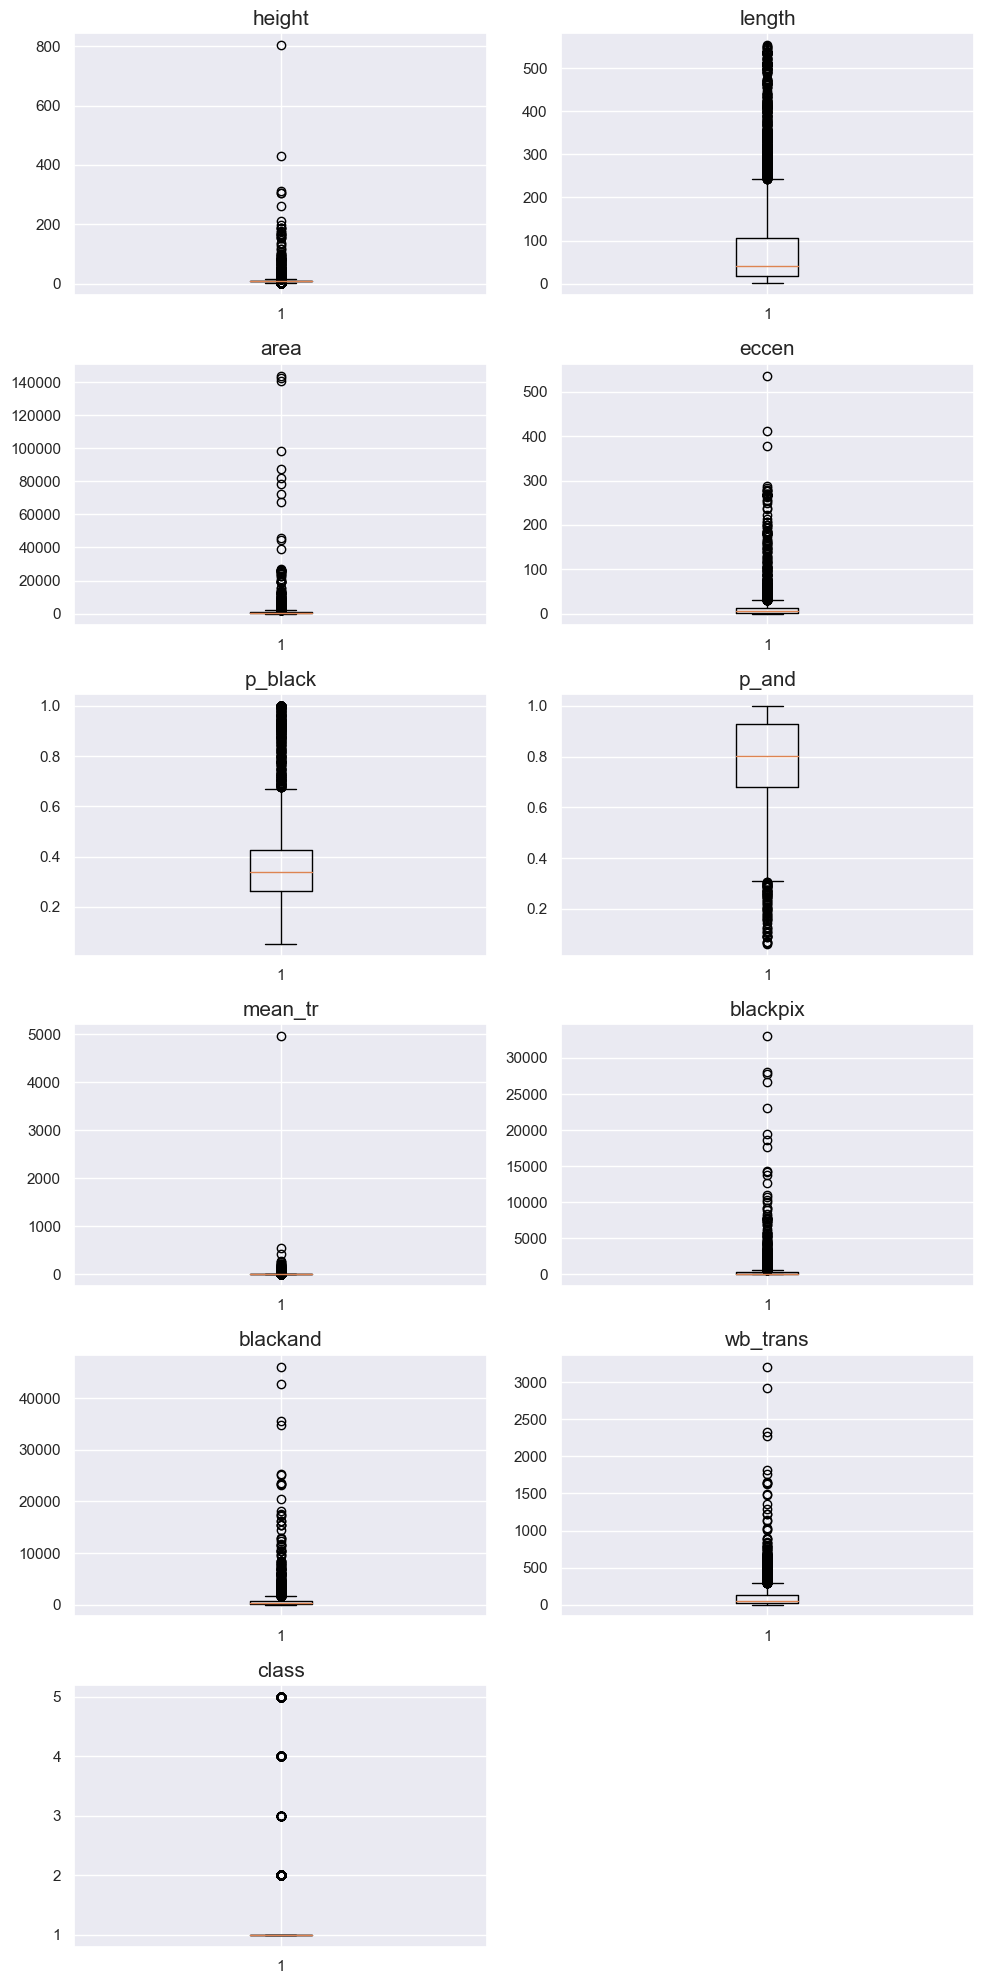

In [39]:
i=1
plt.figure(figsize=(10,20))

for col in filtered_data.columns:
    plt.subplot(6,2,i)
    plt.boxplot(df[col])
    plt.tight_layout()
    plt.title(col,fontsize=15)
    i+=1

In [18]:
filtered_data.shape  #earlier (5473,11)

(4730, 11)

In [19]:
filtered_data.describe().T

,count,mean,std,min,25%,50%,75%,max
height,4730.0,8.413108,2.112344,3.000,7.000,8.000,10.000,14.000
length,4271.0,53.176539,52.583149,1.000,15.000,33.000,78.000,242.000
area,4285.0,460.164294,484.909540,7.000,112.000,270.000,639.000,2277.000
eccen,4465.0,7.264319,7.314545,0.071,2.000,4.429,9.667,30.769
p_black,4619.0,0.330984,0.110531,0.055,0.258,0.327,0.396,0.670
p_and,4695.0,0.788888,0.148744,0.308,0.688,0.800,0.910,1.000
mean_tr,4327.0,2.068313,0.737943,1.000,1.530,1.900,2.380,5.080
blackpix,4387.0,147.303852,146.082699,7.000,41.000,94.000,201.500,647.000
blackand,4349.0,360.975857,364.652365,7.000,95.000,216.000,513.000,1651.000
wb_trans,4318.0,66.635248,64.103819,1.000,18.000,44.000,95.000,289.000


## Creating a CSV file with cleaned dataset

In [40]:
filtered_data.to_csv('Group_10_filtered_data.csv', encoding='utf-8',index=False)

In [41]:
df.to_csv('Group_10_data_cleaned.csv', encoding='utf-8',index=False)

# Normalization for Model Building

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

In [43]:
from sklearn.utils import shuffle
filtered_data = shuffle(filtered_data)

## Z-score Normalization

In [44]:
X = filtered_data.drop(columns=['class'])
Y = filtered_data['class']
X.head()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans
1388,6,9.0,54.0,1.500,0.148000,0.788888,4.000000,8.0,16.0,2.0
317,8,45.0,360.0,5.625,0.156000,0.725000,1.870000,56.0,261.0,30.0
2338,8,1.0,8.0,0.125,0.330984,1.000000,2.068313,7.0,8.0,1.0
3366,7,9.0,63.0,1.286,0.429000,0.667000,3.000000,27.0,42.0,9.0
1813,7,44.0,308.0,6.286,0.218000,0.734000,1.260000,67.0,226.0,53.0


In [45]:
X= (X-X.mean())/X.std()
X.head()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans
1388,-1.142384,-0.884129,-0.880037,-0.811117,-1.675278e+00,-8.240961e-15,2.736876e+00,-0.990181,-0.986619,-1.055308
317,-0.195568,-0.163642,-0.217026,-0.230674,-1.602035e+00,-4.311187e-01,-2.809761e-01,-0.648994,-0.285928,-0.598148
2338,-0.195568,-1.044238,-0.979705,-1.004597,5.590456e-15,1.424581e+00,1.132560e-14,-0.997289,-1.009499,-1.071635
3366,-0.668976,-0.884129,-0.860537,-0.841229,8.973717e-01,-8.225026e-01,1.320044e+00,-0.855128,-0.912260,-0.941018
1813,-0.668976,-0.183655,-0.329695,-0.137663,-1.034404e+00,-3.703868e-01,-1.145244e+00,-0.570805,-0.386026,-0.222624


## Correlation 

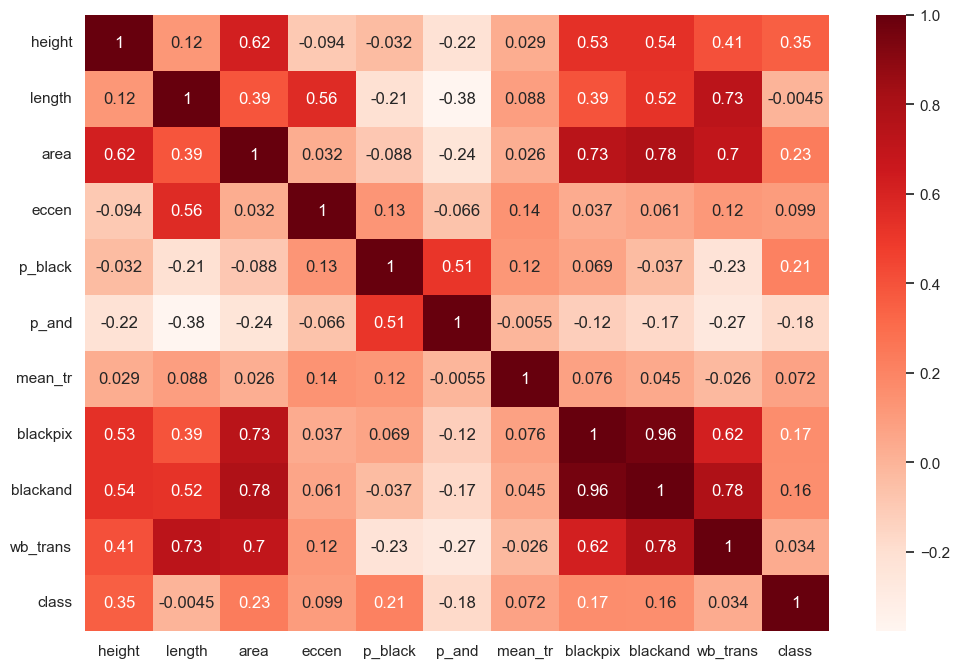

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.corr()
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(correlation, cmap=plt.cm.Reds, annot=True)
plt.show()

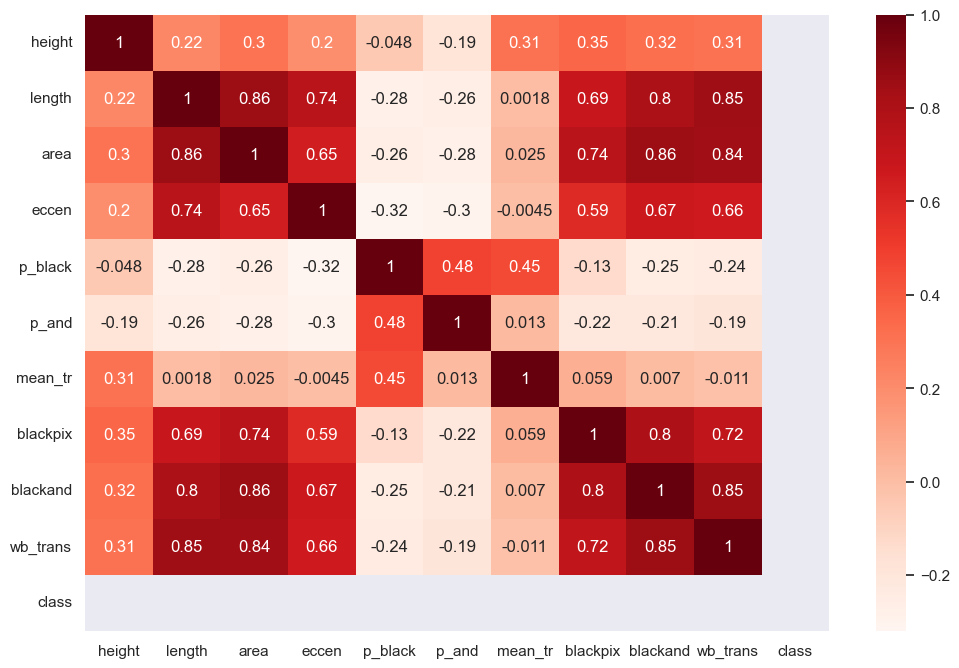

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = filtered_data.corr()
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(correlation, cmap=plt.cm.Reds, annot=True)
plt.show()
#from the heatmap we can see that there's no correction between the target variable with other variables 

In [57]:
corr_1=filtered_data['height'].corr(filtered_data['class'])
corr_1

nan

In [73]:
df['class'].value_counts()

1    4913
2     329
5     115
4      88
3      28
Name: class, dtype: int64